# Predict the lowest Chulalongkorn engineering score from the GAT-PAT score

จัดทำโดยนักศึกษาชั้นปีที่ 2 คณะวิศวกรรมศาสตร์ สาขาวิศวกรรมไฟฟ้า จุฬาลงกรณ์มหาวิทยาลัย

1. เขมกร เชื้อลี 6330041121
2. พรพิพัฒน์ พงษ์ศิริ 6330342021
3. ประสพโชค รอดศิริ 6330304221

และเป็นส่วนหนึ่งของรายวิชา 2102203 Probability and Statistics for Electrical Engineers

### จุดประสงค์
ทำนายคะแนนต่ำสุดที่ใช้ในการสอบเข้าคณะวิศวกรรมศาสตร์จุฬาลงกรณ์มหาวิทยาลัยจากข้อมูล
จำนวนคนตามช่วงคะแนนของ PAT3, PAT1 และ GAT เพื่อช่วยในการตัดสินใจในการเลือกอันดับ Admission ของนักเรียนมัธยมศึกษาปีที่ 6 ในปีถัดๆ ไป

### ไฟล์ข้อมูล Excel
Download file data [data](https://chula-my.sharepoint.com/:x:/g/personal/6330304221_student_chula_ac_th/EfOMgD2iwcREnL2m2pho7tsBItMQ-YXBXNfJPUsZOQyvfg?e=8weD6p) save as (.xlsx) file. upload file to the folder in left hand side before running this code.

gat, pat1, and pat3 sheet are the raw data GAT, PAT1, and PAT3 respectative from mytcas

gat1_new and pat1_new are the data that weight by the number of student that test PAT3

ie. $gat_{new} = gat*\frac{\#\text{student test PAT3}}{\#\text{student test GAT3}}$

## จัดการข้อมูล


*   แบ่งข้อมูลเป็นรายวิชาที่ใช้ในการคิดคะแนนสอบเข้าวิศวกรรมศาสตร์จุฬา 
    *   Pat1, Pat3 และ Gat
*   โดยเป็นข้อมูล score distribution ตั้งแต่ปี 2556 - 2565 โดยแบ่งเป็นข้อมูลจำนวนคน ในช่วงคะแนนละ 30 คะแนน ตั้งแต่ 0 - 300 คะแนน

In [121]:
import numpy as np
import pandas as pd
import scipy

In [123]:
path =  '/content/Prob_stat_project/vidva_weight.xlsx'
df = pd.read_excel(path) 

gat = pd.read_excel(path, sheet_name='gat').set_index('year')
pat1 = pd.read_excel(path, sheet_name='pat1').set_index('year')
gat_weight = pd.read_excel(path, sheet_name='gat_weight').set_index('year')
pat1_weight = pd.read_excel(path, sheet_name='pat1_weight').set_index('year')
pat3 = pd.read_excel(path, sheet_name='pat3').set_index('year')
chula_df = pd.read_excel(path, sheet_name='entrance_data').set_index('year')

In [124]:
pat3

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
65,45,5764,10567,2931,1057,588,281,74,5,0
64,53,4795,12634,6060,2196,1145,698,338,140,15
63,22,3084,14273,9341,3381,1567,880,475,114,10
62,63,5796,15610,7708,2754,1270,730,429,129,4
61,82,7119,16272,7348,2944,1649,979,582,320,52
60,28,4806,22046,15502,4665,1858,932,563,199,24
59,169,14904,28379,9171,2816,1340,683,330,82,5
58,57,7943,21900,11124,4429,2079,1193,686,330,35
57,34,3226,13685,11207,3976,1803,808,415,135,13


In [125]:
pat1_weight

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
65,3114,10628,4693,1510,681,349,185,97,43,12
64,675,11644,10126,3252,1309,571,272,132,67,26
63,4103,16814,7820,2150,921,559,343,206,149,82
62,9147,18210,4693,1262,591,316,158,76,30,10
61,8848,20846,5680,1111,454,217,108,51,24,8
60,17824,26014,4767,1088,444,234,132,74,28,18
59,4407,37465,13533,1611,505,215,88,37,14,4
58,6256,31928,10179,1042,241,83,33,9,4,1
57,3331,19686,9765,1655,545,215,78,20,5,2


In [126]:
gat_weight

,0-30,30-60,60-90,90-120,120-150,150-180,180-210,210-240,240-270,270-300
year,,,,,,,,,,
65,405,2199,2539,4240,5958,4128,1423,361,57,2
64,1076,4013,3550,4187,4005,3658,3510,2388,1327,360
63,805,3434,3237,3860,4878,6206,5453,3251,1664,359
62,711,3623,4412,4953,4560,4877,4959,3383,2243,772
61,1293,5591,3119,2908,3934,7033,7418,3898,1773,380
60,1499,7650,7655,7421,7754,8698,6434,2748,687,77
59,2322,10281,9626,9301,9504,7141,6020,2747,832,105
58,594,7466,8066,7382,6305,6142,7369,4409,1630,413
57,366,4370,3816,3876,4891,6656,6373,3361,1366,227


**แผนภูมิแท่งเปรียบเทียบจำนวนนักเรียนทั้งหมดที่สอบ GAT, PAT1 กับ จำนวนนักเรียนที่สอบ Gat และ PAT3, PAT1 และ PAT3**

![alt text](https://drive.google.com/uc?id=1Hagkc0HyGRbnO23wTQLGvnsd5j183ruD)

## Function



*range_score_interested(lower, upper, subject, year)*

สร้าง list of tuple ที่มีสมาชิกเป็น (lower, lower+30, จำนวนคน) โดยที่ lower+30 <= upper
```
range_score_interested(150, 300, pat1_weight, 65) 
>> [(150, 180, 571), (180, 210, 272), (210, 240, 132), (240, 270, 67), (270, 300, 26)]
```





*random_data_by_weight(range_score_interested(lower, upper, subject, year))*\
สุ่มคะแนนในช่วงคะแนนต่างๆ ตามจำนวนนักเรียนในช่วงนั้นๆ แบบ Uniform([30n, 30(n+1)]) เมื่อ n เป็นสมาชิกของ {0,1, 2, ..., 9} \
ดังนั้น จะได้ว่านักเรียนแต่ละคนจะมีคะแนนเป็นของตัวเองคนละ 1 ครั้ง
```
rand_data_by_weight([(150, 180, 571), (180, 210, 272)])
>> array([165, 157, 157, ..., 179, 180, 185, 182, ..., 210, 205])
```

*shuffle()*\
สลับตำแหน่งข้อมูล เนื่องจากฟังก์ชัน random_data_by_weight จะสุ่มแบบเรียงลำดับจากน้อยไปมาก
```
pat1_rv = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', 64))
print(pat1_rv)
>> [ 29  28  26 ... 296 279 276]
np.random.shuffle(pat1_rv)
print(pat1_rv)
>> [ 44  61  93 ...  33  74 128]
```

*cal_enroll_score(year)*\
คำนวณผลรวมคะแนนโดยมีตัวคูณคะแนน PAT1:PAT3:GAT = 20:60:20\
คืนข้อมูลเป็นข้อมูลคะแนนรวมของนักเรียนที่สอบทั้ง PAT3, PAT1 และ GAT\
```
cal_enroll_score(64)
>> array([27220, 27060, 26520, ..., 16780, 16740, 16560])
```


*find_best_reject()*\
หาจำนวนคนที่สอบ PAT3 แต่ไม่ยื่นเข้าวิศวะจุฬา ที่ทำให้ MAE(Mean Absolute Error) ของ predictMinScore VS Minscore 
```
find_best_reject()
>> 978 (จำนวนคนที่จะไม่ยื่น)
```

In [127]:
from collections import Counter
import matplotlib.pyplot as plt

def plot_bar(score_data):
    """ Plot histogram for total score """
    histogram = Counter(min(score//1000*1000, 29000) for score in score_data)
    plt.bar([lower_bound+500 for lower_bound in histogram.keys()], 
            histogram.values(), 
            1000, 
            edgecolor=(0,0,0)
            )
    plt.xlabel('total score intake to Chula ENG')
    plt.ylabel('Number of people in inteval 1000')
    plt.show()

In [128]:
def range_score_interested(lower, upper, subject, year):
    interval = [lower + (n*30) for n in range((upper-lower) // 30 + 1)]
    rand_score = [(lower + n*30, lower+((n+1)*30), eval(subject)[str(lower+n*30)+'-'+str(lower+((n+1)*30))][year]) for n in range((upper-lower) // 30)]
    return rand_score

In [129]:
def rand_data_by_weight(data: list):
    """ uniform random score with exact number of data in score range"""
    collect_intvs = [np.random.randint(interval[0], interval[1], interval[2]) for interval in data]
    return np.concatenate(collect_intvs)

In [130]:
def shuffle(pat1, pat3, gat):
    """shuffle data"""
    np.random.shuffle(pat3)
    np.random.shuffle(pat1)
    np.random.shuffle(gat)
    return pat1, pat3, gat

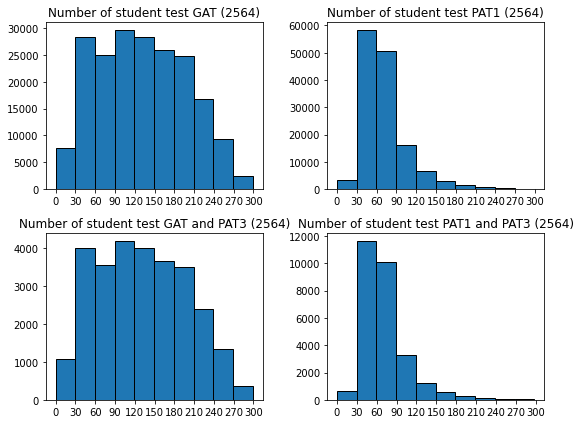

In [131]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)
fig.tight_layout()
gat_plot = rand_data_by_weight(range_score_interested(0, 300, 'gat', 64))
pat1_plot = rand_data_by_weight(range_score_interested(0, 300, 'pat1', 64))
pat1_weight_plot = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', 64))
gat_weight_plot = rand_data_by_weight(range_score_interested(0, 300, 'gat_weight', 64))
plt.setp(axs, xticks=[x for x in range(0, 301, 30)])

axs[0, 0].hist(gat_plot, edgecolor='black'), axs[0, 0].set_title('Number of student test GAT (2564)')
axs[0, 1].hist(pat1_plot, edgecolor='black'), axs[0, 1].set_title('Number of student test PAT1 (2564)')
axs[1, 0].hist(gat_weight_plot, edgecolor='black'), axs[1, 0].set_title('Number of student test GAT and PAT3 (2564)')
axs[1, 1].hist(pat1_weight_plot, edgecolor='black'), axs[1, 1].set_title('Number of student test PAT1 and PAT3 (2564)')
plt.show()

In [132]:
def cal_enroll_score(year):
    """ Calculate total score by weight PAT1:PAT3:GAT = 20:20:60 """
    pat1_rv = rand_data_by_weight(range_score_interested(0, 300, 'pat1_weight', year))
    pat3_rv = rand_data_by_weight(range_score_interested(150, 300, 'pat3', year))
    gat_rv = rand_data_by_weight(range_score_interested(180, 300, 'gat_weight', year))

    pat1_rv = sorted(pat1_rv)[::-1][:1600]
    pat3_rv = sorted(pat3_rv)[::-1][:1600]
    pat1_rv, pat3_rv, gat_rv = shuffle(pat1_rv, pat3_rv, gat_rv)
    min_num = min(len(pat1_rv), len(pat3_rv), len(gat_rv))

    pat1_rv = np.array([pat1_rv[:min_num]]) * 20
    gat_rv =  np.array([gat_rv[:min_num]]) * 20
    pat3_rv =  np.array([pat3_rv[:min_num]]) * 60
    enroll_score = np.sum(np.concatenate((pat3_rv, pat1_rv, gat_rv), axis=0), axis=0)
    enroll_score = np.sort(enroll_score)[::-1]
    return enroll_score

# Tuning parameters 
Find the number of rejected student that make at least sum of absulote errors in predicted score

**Theorem:** SAE(Sum of Absolute Errors), Central limit theorem

In [133]:
def find_best_reject():
    """ error can be negative(less than real min score) and positive """
    years_err = []
    min_n = min(1600-chula_df['intake'])
    for year in range(56,64+1):
        year_err = []
        enroll_score = cal_enroll_score(year)
        real_min, intake = chula_df['min_score'][year],  chula_df['intake'][year]
        for reject in range(0, min_n+1):
            reject_index = np.random.randint(0,  len(enroll_score), reject)
            enroll_score_af_reject =  np.delete(enroll_score, reject_index)
            pred_min =  enroll_score_af_reject[chula_df['intake'][year]]
            err = abs(pred_min-real_min)
            year_err.append(err)
        years_err.append(year_err)
    min_n_reject = min([len(data) for data in years_err])
    data = np.array([year_err[:min_n_reject] for year_err in years_err])
    return np.argmin(np.sum(data, axis=0)/(2565-2556+1))

In [134]:
# Central Limit Theorem
n = np.round(np.mean([find_best_reject() for _ in range(50)]))
n

981.0

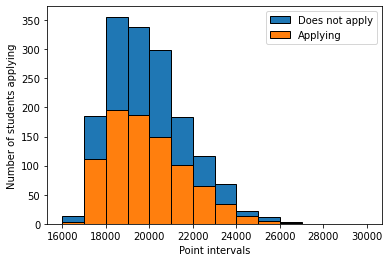

In [135]:
year = 64
enroll_score = cal_enroll_score(year)
i = np.random.randint(0,  len(enroll_score), 978)
enroll_score_af_reject =  np.delete(enroll_score, i)

plt.hist(enroll_score, edgecolor='Black', bins=[x*1000 for x in range(16, 31, 1)])
plt.hist(enroll_score_af_reject, edgecolor='Black', bins=[x*1000 for x in range(16, 31, 1)])

plt.legend(['Does not apply', 'Applying'])
plt.xlabel('Point intervals')
plt.ylabel('Number of students applying')
plt.show()

## Prediction

In [136]:
def predict(year):
    """ input: year, output: (predict_score, real_min_score, error)"""
    real_min = chula_df['min_score'][year]
    enroll_score = cal_enroll_score(year)
    # pos = np.random.randint(0,  len(enroll_score), n)
    pos = np.random.randint(0,  len(enroll_score), 978)
    enroll_score_wo_rej = np.delete(enroll_score, pos)

    if len(enroll_score_wo_rej) < chula_df['intake'][year]:
        pred_score = int(min(enroll_score_wo_rej))
    else:
        pred_score = int(enroll_score_wo_rej[chula_df['intake'][year]])

    return (pred_score, real_min, pred_score-real_min)

In [137]:
def predict_table(ini_year, final_year):
    """ make the table from initial year to final year inputs """
    data = {'year':[], 'predictMinScore':[], 'MinScore': [], 'error':[]}
    
    for year in range(final_year, ini_year-1, -1):
        (pred_score, real_min,err) = [round(data, 2) for data in predict(year)]

        data['year'].append(year)
        data['predictMinScore'].append(pred_score)
        data['MinScore'].append(real_min)
        data['error'].append(err)
    df = pd.DataFrame(data, columns=['year', 'predictMinScore', 'MinScore', 'error'])
    return df

In [138]:
df = predict_table(56, 64)
df

,year,predictMinScore,MinScore,error
0,64,19960,18503,1457
1,63,20260,19985,275
2,62,19420,18360,1060
3,61,19240,17030,2210
4,60,18840,18870,-30
5,59,17620,17510,110
6,58,19100,19090,10
7,57,18300,18552,-252
8,56,19280,19100,180


In [139]:
# Central Limit Theorem
df = predict_table(56, 64) 
for i in range(50): 
    df = df.append(predict_table(56, 64))

In [140]:
# Find mean of PMS(predictMinScore) and mean of Error
gb_year = df.groupby('year')
df1 = gb_year['predictMinScore'].apply(list).reset_index(name='predictMinScore')
df2 = gb_year['error'].apply(list).reset_index(name='error')

result = df1.merge(df2)
result = result.iloc[::-1].reset_index(drop=True)
result['realMinScore'] = chula_df['min_score'].reset_index()['min_score']
result['meanPMS'] = np.round(result['predictMinScore'].apply(np.mean).to_frame())
result['meanError'] = np.round(result['error'].apply(np.mean).to_frame())

In [141]:
result[['year', 'realMinScore','meanPMS','meanError']]

,year,realMinScore,meanPMS,meanError
0,64,15305,19881.0,1378.0
1,63,18503,20280.0,295.0
2,62,19985,19469.0,1109.0
3,61,18360,19202.0,2172.0
4,60,17030,18887.0,17.0
5,59,18870,17660.0,150.0
6,58,17510,19007.0,-83.0
7,57,19090,18231.0,-321.0
8,56,18552,19251.0,151.0


### ผลการทดลอง
1. ได้ผลการทดลองดังตาราง จากผลของแต่ละปีมี error ไม่เกิน 7%  ยกเว้นปี 2561 เนื่องจาก 2561 มีการปรับเปลี่ยนการสอบโดยแบ่งเป็น 2 รอบ โดยมีรอบ 3.1 และ 3.2 และในรอบ 3.1 ผู้เข้าสอบ 1 คนสามารถยื่นได้ 4 คณะและมีสิทธิ์เลือกได้ทั้ง 4 คณะว่าจะเอาคณะไหน ทำให้เกิดปัญหา อย่างเช่น
ผู้สมัครที่อยากเรียนแพทย์ซึ่งมีคะแนนที่สูงแต่ไม่มั่นใจว่าจะติดเลือกวิศวะจุฬาไว้เป็นตัวเลือกสำรอง ดังนั้นจึงทำให้ข้อมูลคะแนนขั้นต่ำที่ประกาศออกมาสูงมากทำให้ข้อมูลที่เราได้รับมามีค่า error ที่สูง 
2. เนื่องจาก ค่าทำนายส่วนใหญ่สูงกว่าค่าจริง และค่าทำนายที่ต่ำกว่าค่าจริงมีน้อย ในปี 2557 ค่าทำนายต่ำกว่าค่าต่ำสุดจริง เท่ากับ 316 คะแนน ซึ่งเป็นค่าทำนายที่ต่ำที่กว่าค่าจริงที่มี Error มากที่สุด
    ดังนั้นหากทำนายหาค่า predictMinScore ปี 2565 จะได้ว่า
นักเรียนที่มี คะแนน >= predictMinScore + 316 คะแนน มีโอกาสเข้าศึกคณะวิศวกรรมศาสตร์อย่างแน่นอนจากสถิติที่มี ณ ตอนนี้

---

# ทำนายคะแนนสอบเข้าวิศวกรรมศาสตร์ปี 2565
ข้อมูลในปีนี้ไม่ได้ถูก train ใน model


In [142]:
pred_score, min_score, err = predict(65)

In [143]:
print("Predicted score: {}, Real min score: {}, Error: {}".format(pred_score, min_score, err))

Predicted score: 15260, Real min score: 15305, Error: -45


By analysis from the report, we need to plus 316 point to the predicted score. so that the result is ...

In [144]:
print("Predicted score: {}, Real min score: {}, Error: {}".format(pred_score+316, min_score, err))

Predicted score: 15576, Real min score: 15305, Error: -45
